# Unsupervised Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#df = pd.read_excel("churn.xlsx")

In [3]:
#csv = df[:100000]
#csv.to_csv("churn.csv")

In [4]:
df = pd.read_csv("churn.csv",)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

musteriref  MailOptIn  smsoptIn CinsiyetKod  siparişsayısı  ürünsayı  \
0         118          1         1           E             12       929   
1         138          0         1           E             12       142   
2         226          0         1           K              2        37   
3         238          0         1           K              9       346   
4         251          0         1           K              4       199   

   toplamtutar  ömür  aktifliksüresi  sonpasifsüre ...   BG  BU  CK1  CK4  \
0     16256.68  2622            2610            12 ...   42  57    0  226   
1      2863.13  2622            2483           139 ...   26   0    0   36   
2       845.25  2622            2546            76 ...   14   0    0    0   
3      9066.94  2622            2248           360 ...   90  85    0   18   
4      3691.80  2622            2351           206 ...    8  24    6   32   

   CK6  CU1  CU4  CU6  ET   EV  
0    0    0   50    0   0  184  
1    0   11   31    0   0    4  
2    0    0   15    0   0    0  
3    9   18   46    0   0   10  
4    0    0    0    0   0   72  

[5 rows x 22 columns]

In [5]:
df = df[:1000]

In [6]:
df.describe()

musteriref    MailOptIn    smsoptIn  siparişsayısı     ürünsayı  \
count  1000.000000  1000.000000  1000.00000    1000.000000  1000.000000   
mean   2664.099000     0.290000     0.54800       9.562000   329.045000   
std    1575.327434     0.453989     0.49794      12.554751   576.616142   
min     106.000000     0.000000     0.00000       1.000000     1.000000   
25%    1232.500000     0.000000     0.00000       2.000000    32.750000   
50%    2835.500000     0.000000     1.00000       5.000000   114.000000   
75%    3934.500000     1.000000     1.00000      11.000000   334.500000   
max    5866.000000     1.000000     1.00000     132.000000  6422.000000   

         toplamtutar         ömür  aktifliksüresi  sonpasifsüre    indirimli  \
count    1000.000000  1000.000000     1000.000000   1000.000000  1000.000000   
mean     6972.296125  2521.727000     2103.323000    127.945000   181.757000   
std     12106.455389    41.661014      645.032056    112.270337   333.259655   
min        14.950000  2489.000000        0.000000      1.000000     0.000000   
25%       775.215000  2494.000000     2166.750000     28.500000    16.000000   
50%      2645.435000  2497.000000     2342.500000     77.500000    63.000000   
75%      7394.152500  2553.000000     2462.000000    222.500000   190.000000   
max    113341.030000  2622.000000     2620.000000    365.000000  4387.000000   

          ...                BG           BU          CK1          CK4  \
count     ...       1000.000000  1000.000000  1000.000000  1000.000000   
mean      ...         77.224000    36.512000    22.531000    41.087000   
std       ...        155.831618    76.862941    88.641245   119.984648   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          2.000000     0.000000     0.000000     0.000000   
50%       ...         20.000000     7.000000     0.000000     0.000000   
75%       ...         81.000000    37.000000     2.000000    23.000000   
max       ...       1697.000000   870.000000  1223.000000  1241.000000   

               CK6          CU1          CU4          CU6           ET  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.128000    22.151000    35.999000     0.983000     0.022000   
std       5.465298    69.814241    94.514274     5.714487     0.540192   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     6.000000    24.000000     0.000000     0.000000   
max      78.000000   906.000000  1187.000000    78.000000    16.000000   

                EV  
count  1000.000000  
mean      8.739000  
std      28.936728  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       6.000000  
max     484.000000  

[8 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
musteriref           1000 non-null int64
MailOptIn            1000 non-null int64
smsoptIn             1000 non-null int64
CinsiyetKod          1000 non-null object
siparişsayısı        1000 non-null int64
ürünsayı             1000 non-null int64
toplamtutar          1000 non-null float64
ömür                 1000 non-null int64
aktifliksüresi       1000 non-null int64
sonpasifsüre         1000 non-null int64
indirimli            1000 non-null int64
sepettekampanyalı    1000 non-null int64
BG                   1000 non-null int64
BU                   1000 non-null int64
CK1                  1000 non-null int64
CK4                  1000 non-null int64
CK6                  1000 non-null int64
CU1                  1000 non-null int64
CU4                  1000 non-null int64
CU6                  1000 non-null int64
ET                   1000 non-null int64
EV                   1000 non-

# Exploratory Data Analysis

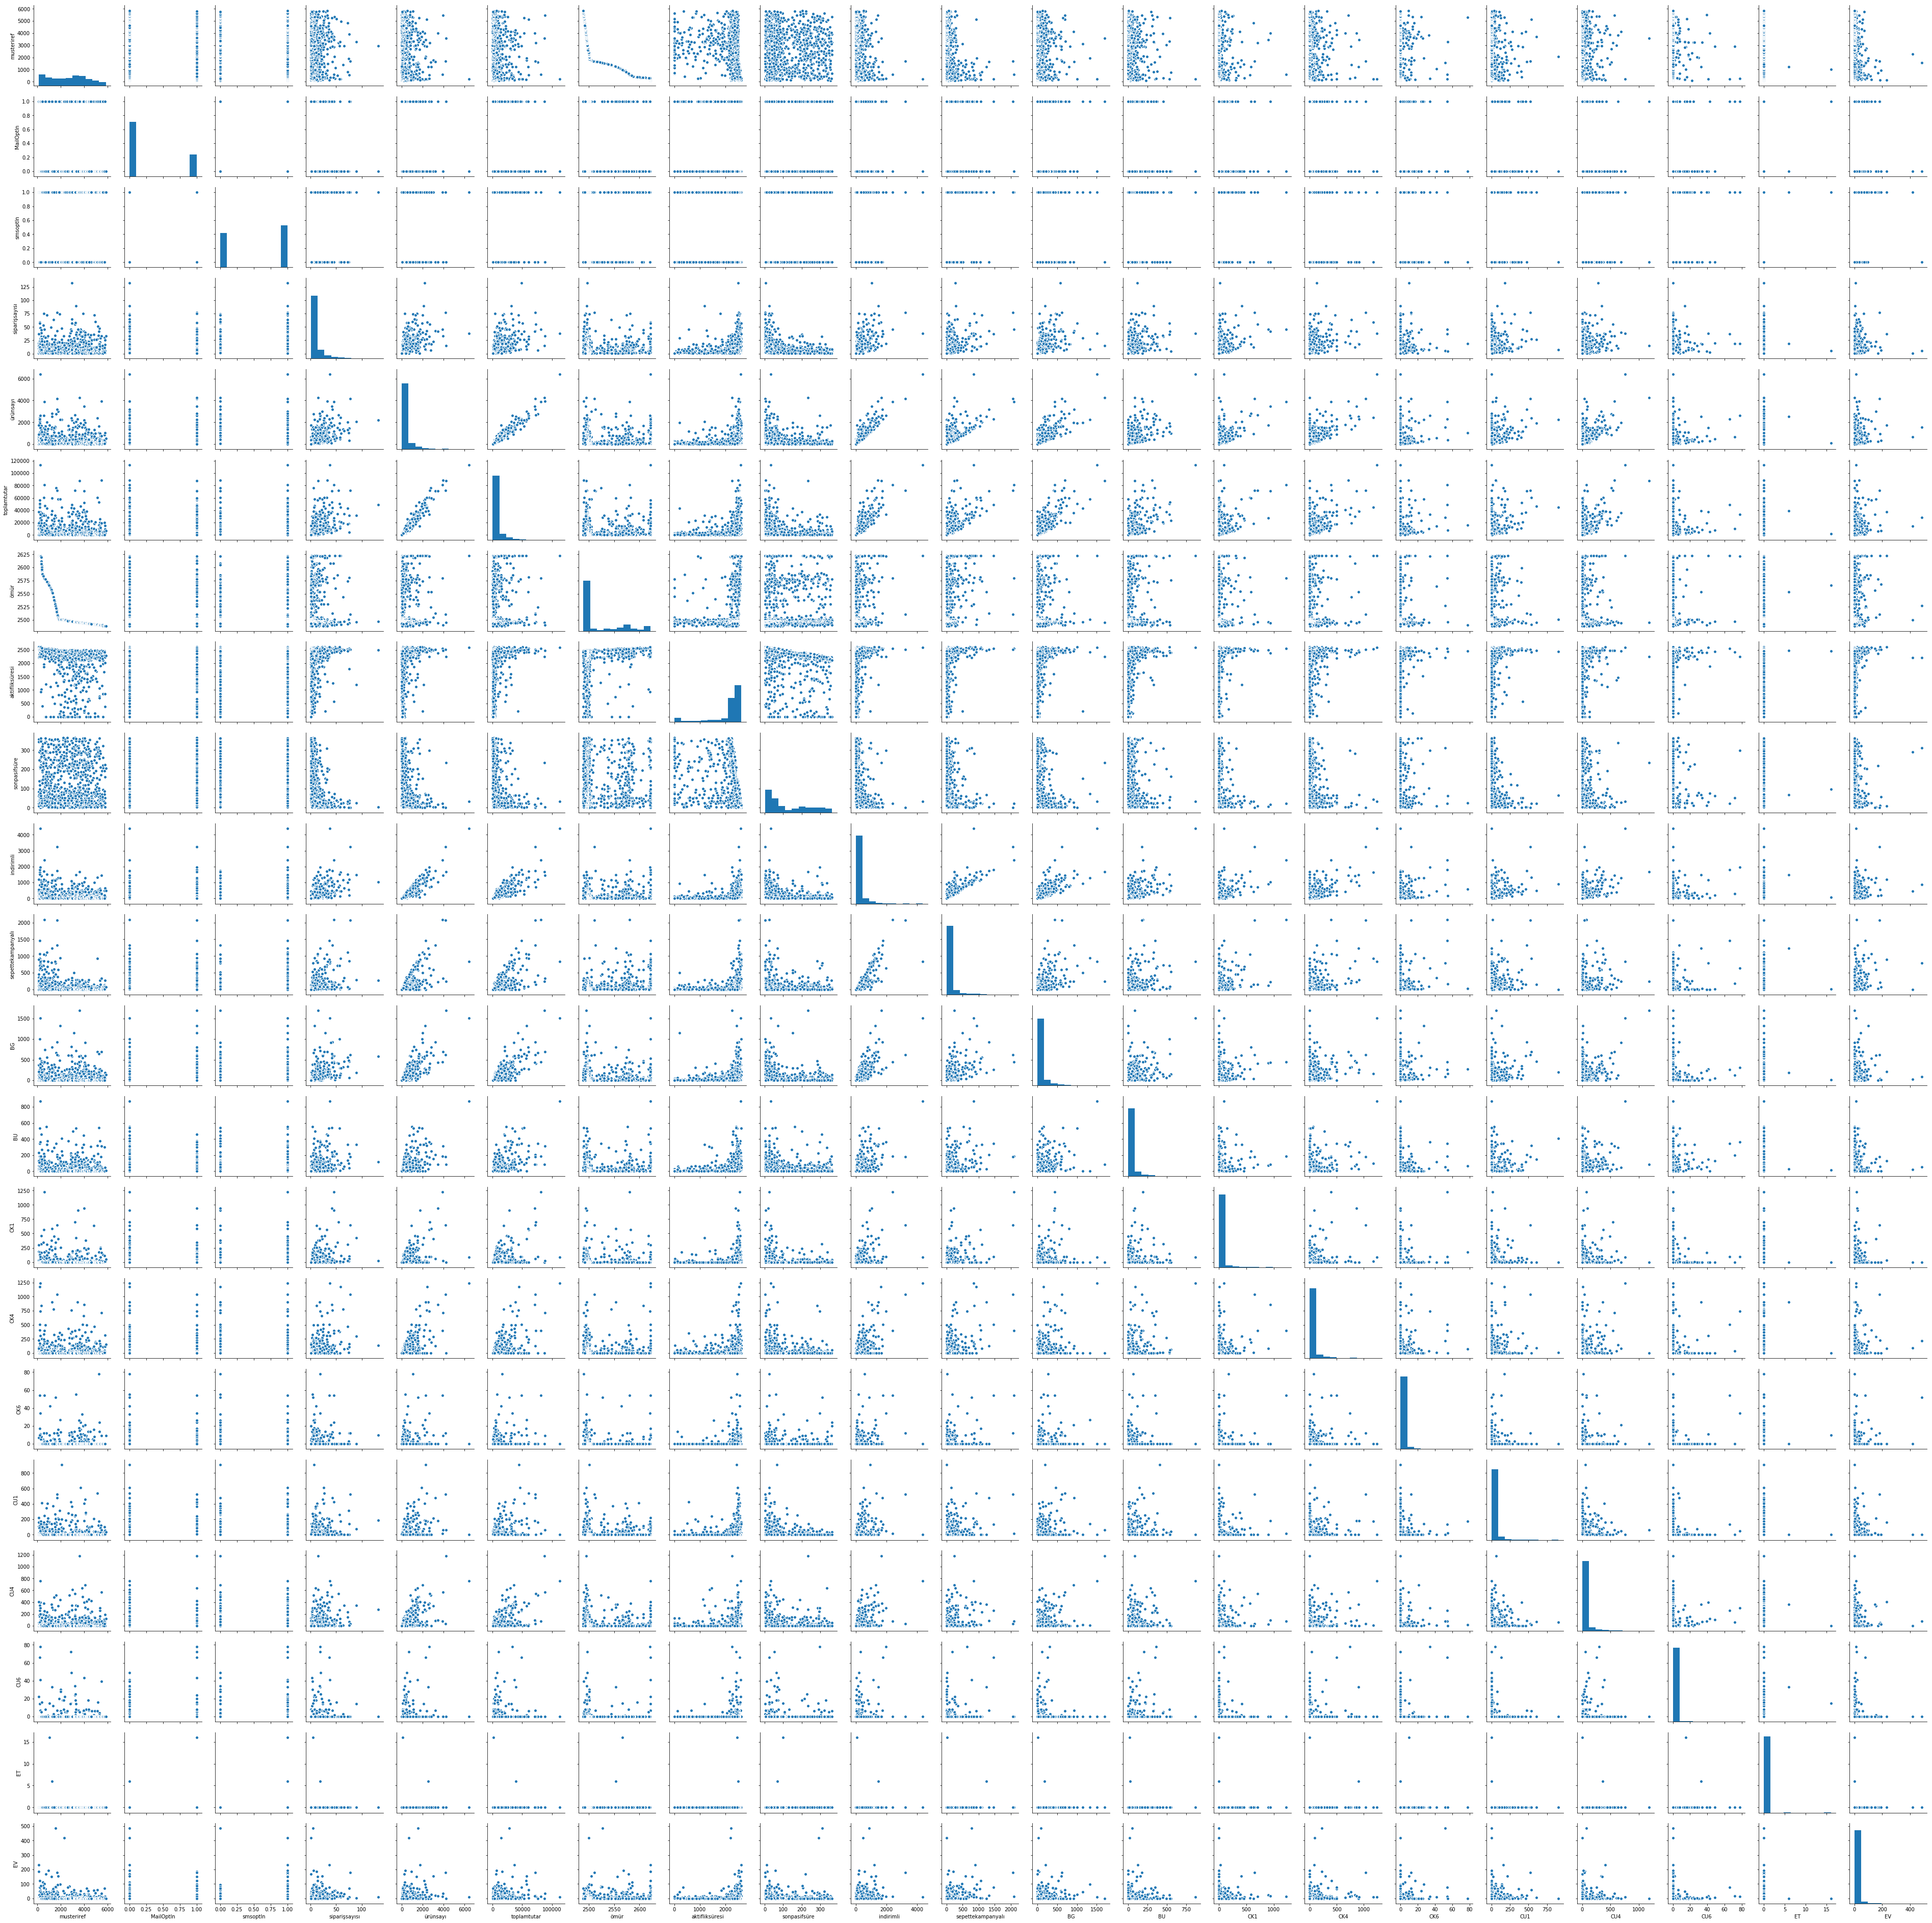

In [41]:
sns.pairplot(df)

Text(0.5,1,'Correlation Heatmap')

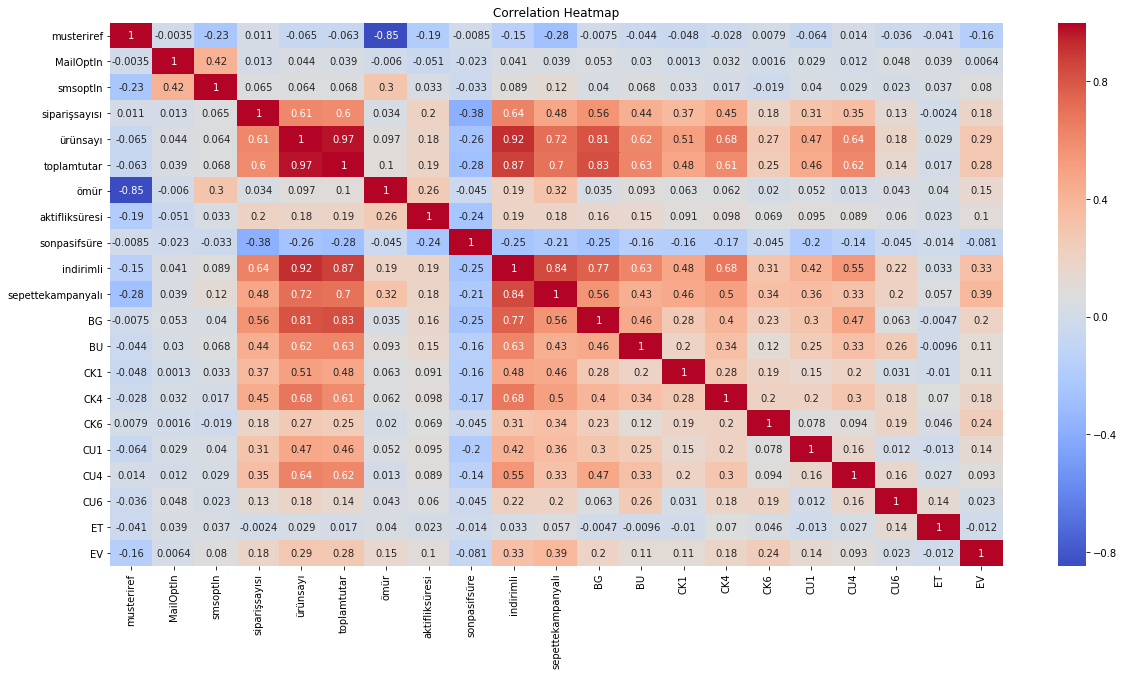

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")

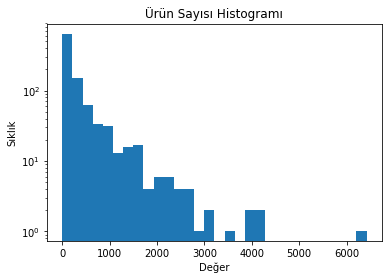

In [9]:
plt.hist(df["ürünsayı"],log=True,bins=30)
plt.title("Ürün Sayısı Histogramı")
plt.xlabel("Değer")
plt.ylabel("Sıklık")

fig = plt.gcf()

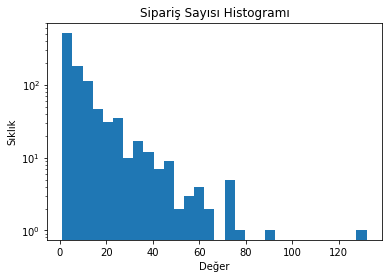

In [10]:
plt.hist(df["siparişsayısı"],log=True,bins=30)
plt.title("Sipariş Sayısı Histogramı")
plt.xlabel("Değer")
plt.ylabel("Sıklık")

fig = plt.gcf()

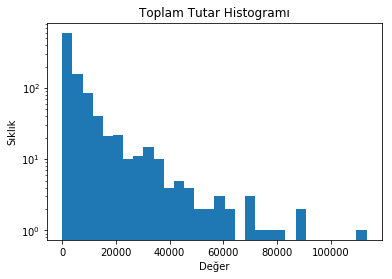

In [11]:
plt.hist(df["toplamtutar"],log=True,bins=30)
plt.title("Toplam Tutar Histogramı")
plt.xlabel("Değer")
plt.ylabel("Sıklık")

fig = plt.gcf()

# Data Preprocessing

In [14]:
#Cinsiyet kolonu yeterli veri olmamasından dolayı gürültü yaratmamak için impute edildi.
df.drop(["CinsiyetKod"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
musteriref           1000 non-null int64
MailOptIn            1000 non-null int64
smsoptIn             1000 non-null int64
siparişsayısı        1000 non-null int64
ürünsayı             1000 non-null int64
toplamtutar          1000 non-null float64
ömür                 1000 non-null int64
aktifliksüresi       1000 non-null int64
sonpasifsüre         1000 non-null int64
indirimli            1000 non-null int64
sepettekampanyalı    1000 non-null int64
BG                   1000 non-null int64
BU                   1000 non-null int64
CK1                  1000 non-null int64
CK4                  1000 non-null int64
CK6                  1000 non-null int64
CU1                  1000 non-null int64
CU4                  1000 non-null int64
CU6                  1000 non-null int64
ET                   1000 non-null int64
EV                   1000 non-null int64
dtypes: float64(1), int64(20)
m

In [15]:
from sklearn.preprocessing import RobustScaler

toScale = [["siparişsayısı","ürünsayı","toplamtutar","ömür","aktifliksüresi",
              "sonpasifsüre","indirimli","sepettekampanyalı","BG","BU","CK1",
              "CK4","CK6","CU1","CU4","CU6","ET","EV"]]

scaler = RobustScaler()
scaler.fit(df.drop(["musteriref","MailOptIn","smsoptIn"],axis=1))
scaled_features = scaler.fit_transform(df.drop(["musteriref","MailOptIn","smsoptIn"],axis=1))

df_scaled = pd.DataFrame(scaled_features,columns=toScale)
df_scaled.head()

siparişsayısı  ürünsayı toplamtutar      ömür aktifliksüresi sonpasifsüre  \
0      0.777778  2.700911    2.056409  2.118644       0.906012    -0.337629   
1      0.777778  0.092792    0.032890  2.118644       0.475868     0.317010   
2     -0.333333 -0.255178   -0.271975  2.118644       0.689246    -0.007732   
3      0.444444  0.768848    0.970172  2.118644      -0.320068     1.456186   
4     -0.111111  0.281690    0.158087  2.118644       0.028789     0.662371   

  indirimli sepettekampanyalı        BG        BU  CK1       CK4  CK6  \
0  2.844828          2.622951  0.278481  1.351351  0.0  9.826087  0.0   
1  0.258621          1.127869  0.075949 -0.189189  0.0  1.565217  0.0   
2 -0.195402          0.131148 -0.075949 -0.189189  0.0  0.000000  0.0   
3  1.224138          3.396721  0.886076  2.108108  0.0  0.782609  9.0   
4  0.454023          1.337705 -0.151899  0.459459  3.0  1.391304  0.0   

        CU1       CU4  CU6   ET         EV  
0  0.000000  2.083333  0.0  0.0  30.666667  
1  1.833333  1.291667  0.0  0.0   0.666667  
2  0.000000  0.625000  0.0  0.0   0.000000  
3  3.000000  1.916667  0.0  0.0   1.666667  
4  0.000000  0.000000  0.0  0.0  12.000000

In [51]:
# Scaling işlemi uygulanmaya verilerin tabloya geri eklenmesi
cols = df.columns.tolist()
df_scaled["musteriref"] = df["musteriref"]
df_scaled["MailOptIn"] = df["MailOptIn"]
df_scaled["smsoptIn"] = df["smsoptIn"]
df_scaled = df_scaled[cols]
df_scaled.head()

musteriref MailOptIn smsoptIn siparişsayısı  ürünsayı toplamtutar      ömür  \
0        118         1        1      0.777778  2.700911    2.056409  2.118644   
1        138         0        1      0.777778  0.092792    0.032890  2.118644   
2        226         0        1     -0.333333 -0.255178   -0.271975  2.118644   
3        238         0        1      0.444444  0.768848    0.970172  2.118644   
4        251         0        1     -0.111111  0.281690    0.158087  2.118644   

  aktifliksüresi sonpasifsüre indirimli    ...            BG        BU  CK1  \
0       0.906012    -0.337629  2.844828    ...      0.278481  1.351351  0.0   
1       0.475868     0.317010  0.258621    ...      0.075949 -0.189189  0.0   
2       0.689246    -0.007732 -0.195402    ...     -0.075949 -0.189189  0.0   
3      -0.320068     1.456186  1.224138    ...      0.886076  2.108108  0.0   
4       0.028789     0.662371  0.454023    ...     -0.151899  0.459459  3.0   

        CK4  CK6       CU1       CU4  CU6   ET         EV  
0  9.826087  0.0  0.000000  2.083333  0.0  0.0  30.666667  
1  1.565217  0.0  1.833333  1.291667  0.0  0.0   0.666667  
2  0.000000  0.0  0.000000  0.625000  0.0  0.0   0.000000  
3  0.782609  9.0  3.000000  1.916667  0.0  0.0   1.666667  
4  1.391304  0.0  0.000000  0.000000  0.0  0.0  12.000000  

[5 rows x 21 columns]

In [55]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
(musteriref,)           1000 non-null int64
(MailOptIn,)            1000 non-null int64
(smsoptIn,)             1000 non-null int64
(siparişsayısı,)        1000 non-null float64
(ürünsayı,)             1000 non-null float64
(toplamtutar,)          1000 non-null float64
(ömür,)                 1000 non-null float64
(aktifliksüresi,)       1000 non-null float64
(sonpasifsüre,)         1000 non-null float64
(indirimli,)            1000 non-null float64
(sepettekampanyalı,)    1000 non-null float64
(BG,)                   1000 non-null float64
(BU,)                   1000 non-null float64
(CK1,)                  1000 non-null float64
(CK4,)                  1000 non-null float64
(CK6,)                  1000 non-null float64
(CU1,)                  1000 non-null float64
(CU4,)                  1000 non-null float64
(CU6,)                  1000 non-null float64
(ET,)                   10

In [56]:
df_scaled.describe()

musteriref    MailOptIn    smsoptIn siparişsayısı     ürünsayı  \
count  1000.000000  1000.000000  1000.00000   1000.000000  1000.000000   
mean   2664.099000     0.290000     0.54800      0.506889     0.712659   
std    1575.327434     0.453989     0.49794      1.394972     1.910907   
min     106.000000     0.000000     0.00000     -0.444444    -0.374482   
25%    1232.500000     0.000000     0.00000     -0.333333    -0.269263   
50%    2835.500000     0.000000     1.00000      0.000000     0.000000   
75%    3934.500000     1.000000     1.00000      0.666667     0.730737   
max    5866.000000     1.000000     1.00000     14.111111    20.904722   

       toplamtutar         ömür aktifliksüresi sonpasifsüre    indirimli  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean      0.653709     0.419102      -0.810083     0.260026     0.682511   
std       1.829063     0.706119       2.184698     0.578713     1.915285   
min      -0.397418    -0.135593      -7.933954    -0.394330    -0.362069   
25%      -0.282556    -0.050847      -0.595258    -0.252577    -0.270115   
50%       0.000000     0.000000       0.000000     0.000000     0.000000   
75%       0.717444     0.949153       0.404742     0.747423     0.729885   
max      16.724073     2.118644       0.939881     1.481959    24.850575   

          ...                BG           BU          CK1          CK4  \
count     ...       1000.000000  1000.000000  1000.000000  1000.000000   
mean      ...          0.724354     0.797622    11.265500     1.786391   
std       ...          1.972552     2.077377    44.320622     5.216724   
min       ...         -0.253165    -0.189189     0.000000     0.000000   
25%       ...         -0.227848    -0.189189     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     0.000000   
75%       ...          0.772152     0.810811     1.000000     1.000000   
max       ...         21.227848    23.324324   611.500000    53.956522   

               CK6          CU1          CU4          CU6           ET  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.128000     3.691833     1.499958     0.983000     0.022000   
std       5.465298    11.635707     3.938095     5.714487     0.540192   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     1.000000     0.000000     0.000000   
max      78.000000   151.000000    49.458333    78.000000    16.000000   

                EV  
count  1000.000000  
mean      1.456500  
std       4.822788  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max      80.666667  

[8 rows x 21 columns]

Text(0.5,1,'Standardized Correlation Heatmap')

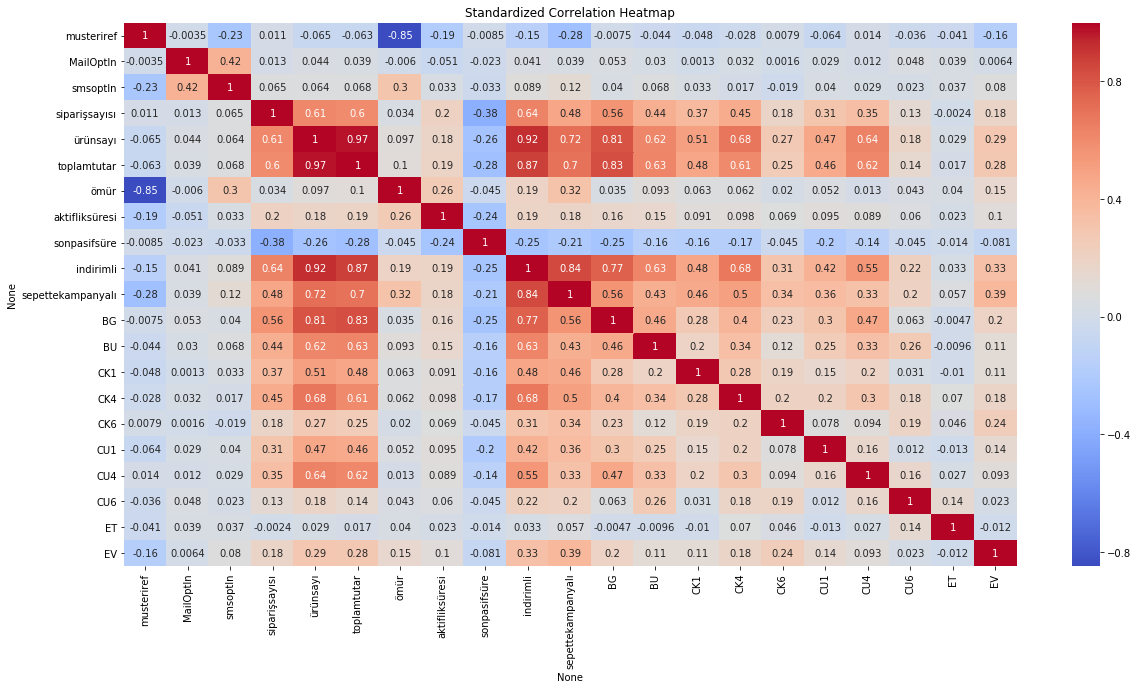

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_scaled.corr(),cmap="coolwarm",annot=True)
plt.title("Standardized Correlation Heatmap")

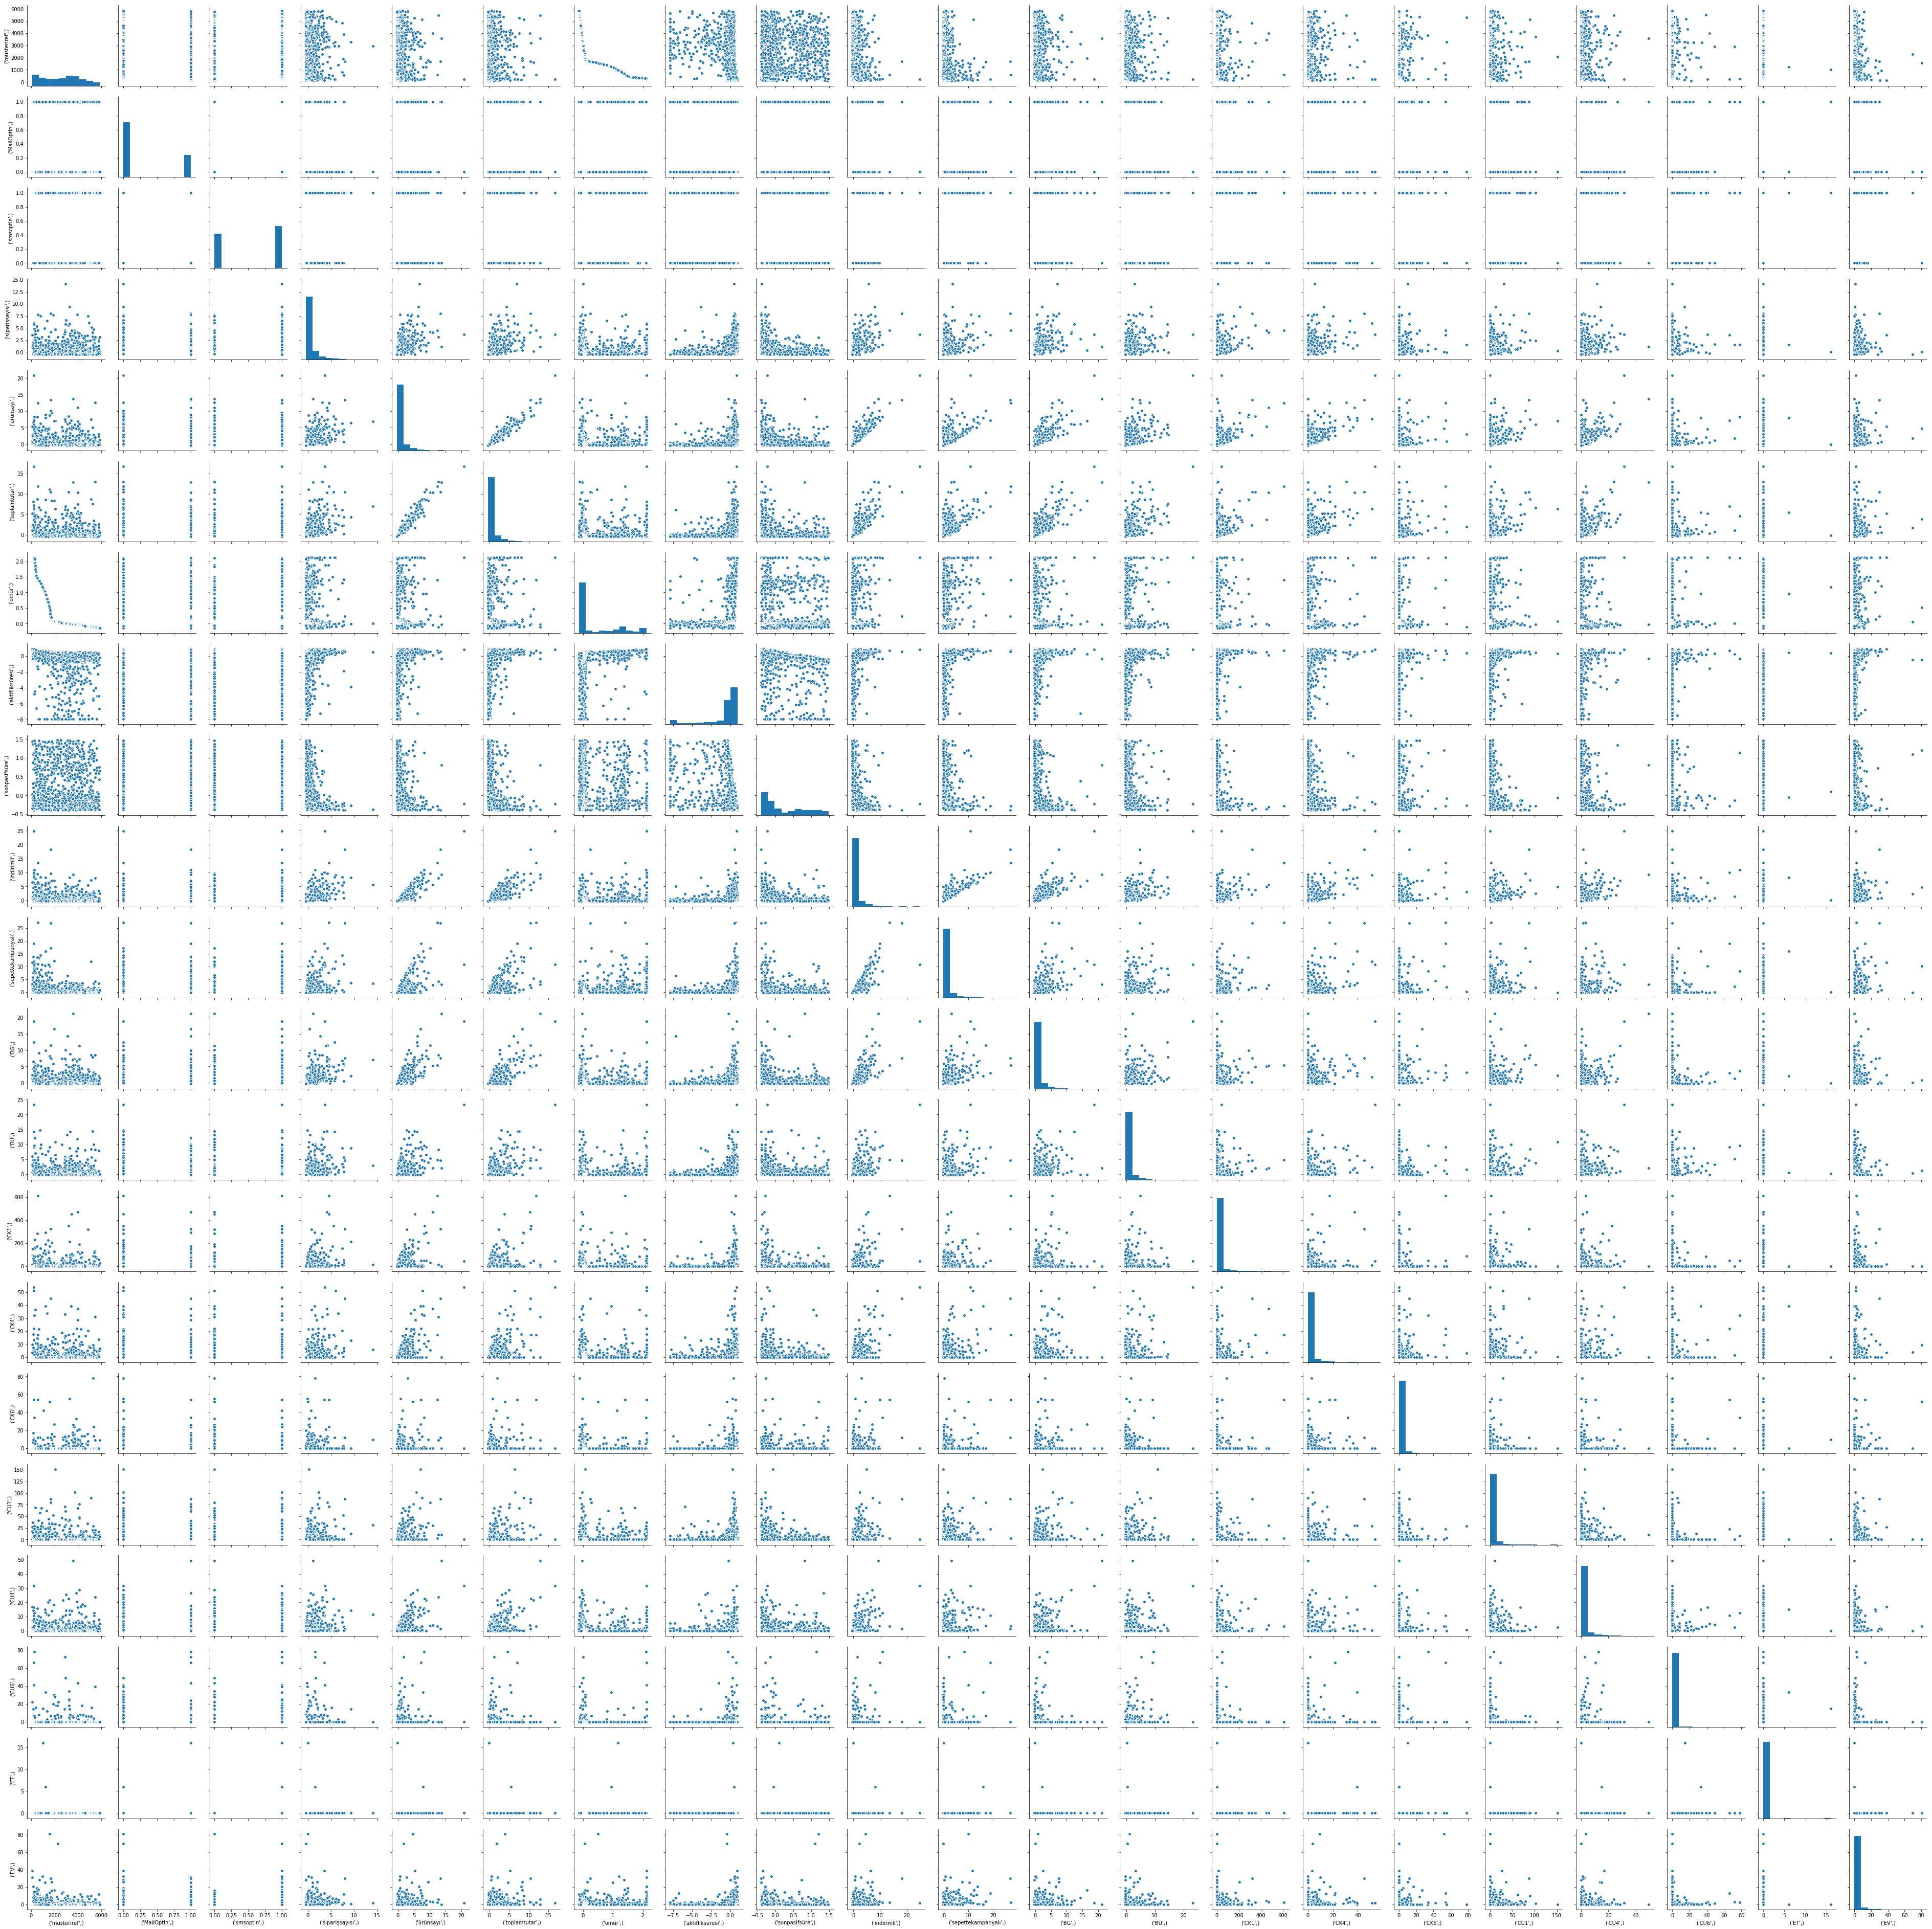

In [54]:
sns.pairplot(df_scaled)